x position - MSE: 17.0666, MAE: 3.4634, R2: 0.0821
y position - MSE: 17.3450, MAE: 3.4702, R2: 0.0893
x velocity - MSE: 43.7982, MAE: 4.9607, R2: 0.2151
y velocity - MSE: 48.3088, MAE: 4.9674, R2: 0.1807


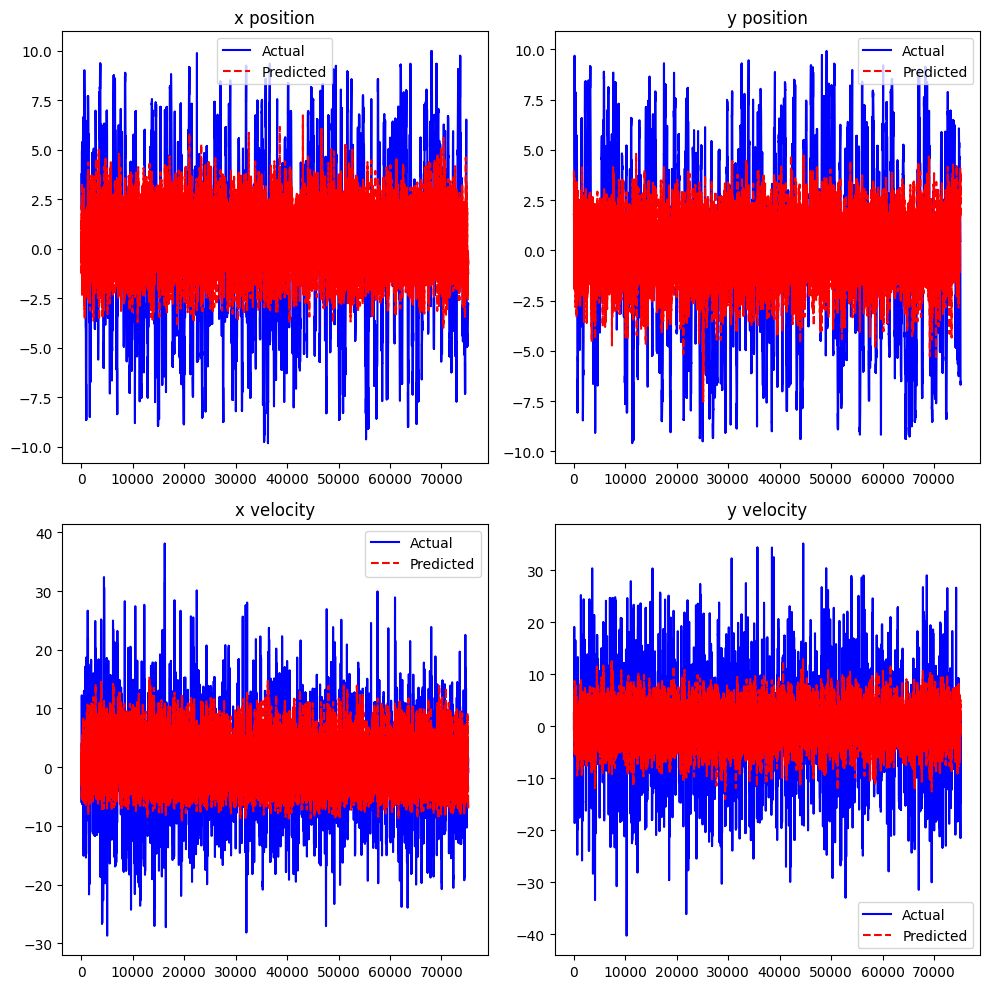

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import scipy.io

X_smoothed_mat = scipy.io.loadmat('X_smoothed.mat')  
Y_mat = scipy.io.loadmat('kinematics_collated.mat')  
X_smoothed = X_smoothed_mat['X_smoothed']  
Y = Y_mat['kinematics_collated']  
X = X_smoothed.T  
Y = Y.T  
assert X.shape[0] == Y.shape[0], "Mismatch in number of timestamps between X and Y"
model = LinearRegression()
predictions = np.zeros_like(Y)  

for i in range(Y.shape[1]):
    model.fit(X, Y[:, i])
    predictions[:, i] = model.predict(X)
mse_list = []
mae_list = []
r2_list = []

for i in range(Y.shape[1]):
    mse = mean_squared_error(Y[:, i], predictions[:, i])
    mae = mean_absolute_error(Y[:, i], predictions[:, i])
    r2 = r2_score(Y[:, i], predictions[:, i])
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

features = ['x position', 'y position', 'x velocity', 'y velocity']
for i, (mse, mae, r2) in enumerate(zip(mse_list, mae_list, r2_list)):
    print(f"{features[i]} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.plot(Y[:, i], label="Actual", color='blue')
    ax.plot(predictions[:, i], label="Predicted", linestyle='--', color='red')
    ax.set_title(features[i])
    ax.legend()

plt.tight_layout()
plt.show()
